In [3]:
import pandas as pd
import numpy as np
import os 
import datetime 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color,exposure

from sklearn.metrics import accuracy_score

In [7]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [8]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
len(np.unique(y_train))

43

In [ ]:
if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [ ]:
y_train.shape
y_test.shape

(4410, 43)

In [ ]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [ ]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model.fit(X_train, y_train)

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data', (X_train,y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [ ]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

1088/1088 [==============================] - 8s 7ms/step - loss: 4.6434 - accuracy: 0.7868
Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 0.1648 - accuracy: 0.9603 - val_loss: 0.0888 - val_accuracy: 0.9785
Epoch 2/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0841 - accuracy: 0.9795 - val_loss: 0.0506 - val_accuracy: 0.9872
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0573 - accuracy: 0.9864 - val_loss: 0.0509 - val_accuracy: 0.9910
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0516 - accuracy: 0.9881 - val_loss: 0.0383 - val_accuracy: 0.9921
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0431 - accuracy: 0.9901 - val_loss: 0.0425 - val_accuracy: 0.9902


In [ ]:
def predict(model_trained,X_test,y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [ ]:
predict(model_trained, X_test, y_test)

0.8387755102040816

In [ ]:
def train_and_predict(model): 
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [ ]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'), 
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))



1088/1088 [==============================] - 9s 8ms/step - loss: 2.4186 - accuracy: 0.5826
Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 0.4398 - accuracy: 0.8682 - val_loss: 0.1426 - val_accuracy: 0.9732
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3006 - accuracy: 0.9094 - val_loss: 0.0987 - val_accuracy: 0.9828
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2406 - accuracy: 0.9270 - val_loss: 0.0561 - val_accuracy: 0.9891
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1988 - accuracy: 0.9398 - val_loss: 0.0466 - val_accuracy: 0.9924
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1674 - accuracy: 0.9497 - val_loss: 0.0485 - val_accuracy: 0.9920


0.9319727891156463

In [ ]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'), 
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

1088/1088 [==============================] - 13s 12ms/step - loss: 1.2067 - accuracy: 0.6946
Epoch 1/5
272/272 [==============================] - 10s 38ms/step - loss: 0.2329 - accuracy: 0.9303 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1521 - accuracy: 0.9533 - val_loss: 0.0422 - val_accuracy: 0.9913
Epoch 3/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1177 - accuracy: 0.9635 - val_loss: 0.0304 - val_accuracy: 0.9945
Epoch 4/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1009 - accuracy: 0.9685 - val_loss: 0.0144 - val_accuracy: 0.9972
Epoch 5/5
272/272 [==============================] - 10s 36ms/step - loss: 0.0900 - accuracy: 0.9724 - val_loss: 0.0190 - val_accuracy: 0.9954


0.9564625850340136

In [ ]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'), 
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))

1088/1088 [==============================] - 15s 14ms/step - loss: 1.6684 - accuracy: 0.5311
Epoch 1/5
272/272 [==============================] - 13s 47ms/step - loss: 0.3271 - accuracy: 0.8976 - val_loss: 0.0888 - val_accuracy: 0.9759
Epoch 2/5
272/272 [==============================] - 12s 44ms/step - loss: 0.1984 - accuracy: 0.9380 - val_loss: 0.0438 - val_accuracy: 0.9878
Epoch 3/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1578 - accuracy: 0.9523 - val_loss: 0.0418 - val_accuracy: 0.9896
Epoch 4/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1303 - accuracy: 0.9598 - val_loss: 0.0205 - val_accuracy: 0.9942
Epoch 5/5
272/272 [==============================] - 12s 44ms/step - loss: 0.1110 - accuracy: 0.9659 - val_loss: 0.0214 - val_accuracy: 0.9945


0.9628117913832199

In [ ]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'), 
    Dropout(0.3),

    Dense(1024, activation='relu'), 
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

1088/1088 [==============================] - 16s 14ms/step - loss: 1.6991 - accuracy: 0.5090
Epoch 1/5
272/272 [==============================] - 14s 51ms/step - loss: 0.3836 - accuracy: 0.8793 - val_loss: 0.1059 - val_accuracy: 0.9695
Epoch 2/5
272/272 [==============================] - 13s 48ms/step - loss: 0.2550 - accuracy: 0.9205 - val_loss: 0.0675 - val_accuracy: 0.9812
Epoch 3/5
272/272 [==============================] - 13s 47ms/step - loss: 0.2043 - accuracy: 0.9362 - val_loss: 0.0436 - val_accuracy: 0.9864
Epoch 4/5
272/272 [==============================] - 13s 47ms/step - loss: 0.1603 - accuracy: 0.9515 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 5/5
272/272 [==============================] - 13s 46ms/step - loss: 0.1531 - accuracy: 0.9543 - val_loss: 0.0298 - val_accuracy: 0.9923


0.9714285714285714

In [ ]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [ ]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train,params_fit={})
predict(model_trained, X_test_gray, y_test)

1088/1088 [==============================] - 16s 14ms/step - loss: 1.8838 - accuracy: 0.4545
Epoch 1/5
272/272 [==============================] - 13s 47ms/step - loss: 0.3469 - accuracy: 0.8860 - val_loss: 0.1026 - val_accuracy: 0.9677
Epoch 2/5
272/272 [==============================] - 12s 45ms/step - loss: 0.2411 - accuracy: 0.9219 - val_loss: 0.0592 - val_accuracy: 0.9819
Epoch 3/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1827 - accuracy: 0.9406 - val_loss: 0.0609 - val_accuracy: 0.9799
Epoch 4/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1474 - accuracy: 0.9535 - val_loss: 0.0278 - val_accuracy: 0.9916
Epoch 5/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1219 - accuracy: 0.9609 - val_loss: 0.0239 - val_accuracy: 0.9924


0.9768707482993197

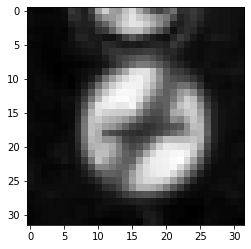

In [ ]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [12]:
def preproc_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    return img


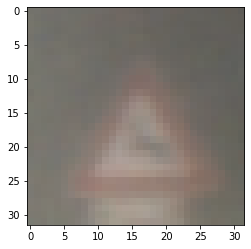

In [9]:
plt.imshow(X_train[400])

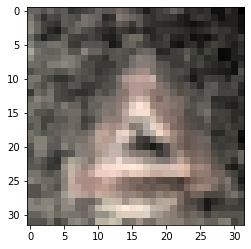

In [13]:
plt.imshow(preproc_img(X_train[400]))

In [ ]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tqdm(range(X_train.shape[0])):
    X_train_prp[i] = preproc_img(X_train[i])